# Importar librerias

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Generar datos

In [2]:
np.random.seed(0)
n_samples = 200
t=np.arange(n_samples)

time_series = 0.1*t+ np.random.randn(n_samples)

# Split dataset

In [3]:
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Gráfica

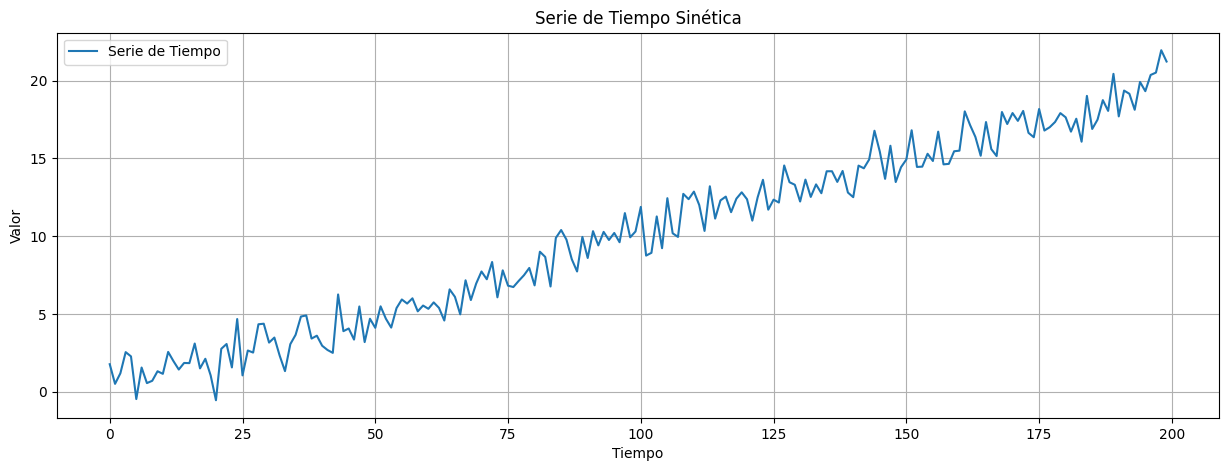

In [4]:
plt.figure(figsize=(15,5))
plt.plot(t,time_series,label='Serie de Tiempo')
plt.title('Serie de Tiempo Sinética')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

# Modelo

In [5]:
from re import X
def create_dataset(dataset, seq_length):
  X, y = [], []
  for i in range(len(dataset) - seq_length):
    X.append(dataset[i:i+seq_length])
    y.append(dataset[i+seq_length])
  return np.array(X), np.array(y)

seq_length = 16
X_train, y_train = create_dataset(train, seq_length)
X_test, y_test = create_dataset(test, seq_length)

In [6]:
model=Sequential()
model.add(LSTM(32,
               activation='relu',
               input_shape=(seq_length,1),
               return_sequences=True))
model.add(LSTM(32,
               activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',loss='mse')

In [8]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - loss: 99.6700
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 93.5643
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 82.0076
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 61.0863
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 20.1095
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 13.4176
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.5336
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 6.0104
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 5.3759
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 3.3954
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 2.5927
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.0735
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1.3729
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.1907
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.9402
Epoch 16/100

In [9]:
Evaluacion=model.evaluate(X_test,y_test)
print('MSE: ',Evaluacion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - loss: 4.8566
MSE:  4.856555938720703


# Predicción

In [10]:
y_pred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


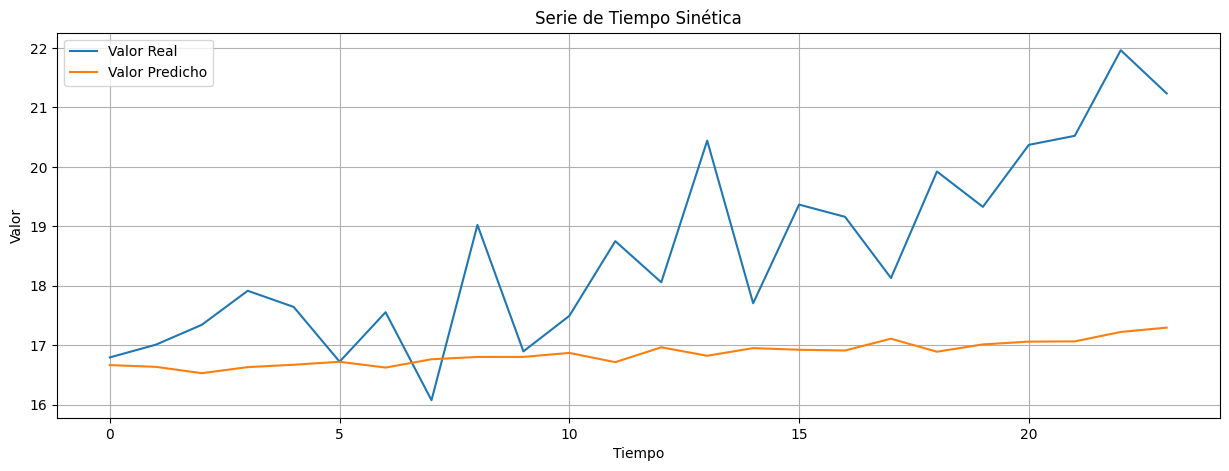

In [11]:
plt.figure(figsize=(15,5))
plt.plot(y_test,label='Valor Real')
plt.plot(y_pred,label='Valor Predicho')
plt.title('Serie de Tiempo Sinética')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

# Métricas

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae = mean_absolute_error( y_test, y_pred)
rmse = np.sqrt(mean_squared_error( y_test, y_pred))
mape = np.mean(np.abs(( y_test - y_pred) /  y_test)) * 100
r2 = r2_score( y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')
print(f'R²: {r2}')

# Cálculo de los errores (residuos)
errors = y_test-y_pred

resultados = pd.DataFrame({
    'Predicciones': y_pred,
    'Valores Reales': y_test,
    'Errores': errors
})

# Imprimir la tabla con las predicciones, valores reales y errores
print(resultados)

# Graficar los errores
plt.figure(figsize=(10, 6))
plt.plot(resultados['Errores'], marker='o', linestyle='-', color='r', label='Errores')
plt.axhline(0, color='black', linewidth=1.5)  # Línea en el cero para facilitar la visualización
plt.title('Errores de las Predicciones del Modelo SARIMA')
plt.xlabel('Índice')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

MAE: 1.7554498564432592
RMSE: 2.2037596071396677
MAPE: 9.130319119121765%
R²: -1.0456675231596062


ValueError: Per-column arrays must each be 1-dimensional

In [16]:
errors

array([[ 1.29046925e-01,  3.42906811e-01,  6.76924085e-01,
         1.24993575e+00,  9.78462677e-01,  5.75052953e-02,
         8.88838186e-01, -5.90946563e-01,  2.35768804e+00,
         2.30398933e-01,  8.28073249e-01,  2.08462167e+00,
         1.39289359e+00,  3.77547118e+00,  1.03959968e+00,
         2.69950746e+00,  2.49317377e+00,  1.46436309e+00,
         3.25573325e+00,  2.66091026e+00,  3.70424714e+00,
         3.85596074e+00,  5.29569254e+00,  4.56898454e+00],
       [ 1.58330448e-01,  3.72190335e-01,  7.06207609e-01,
         1.27921927e+00,  1.00774620e+00,  8.67888189e-02,
         9.18121709e-01, -5.61663040e-01,  2.38697156e+00,
         2.59682457e-01,  8.57356773e-01,  2.11390519e+00,
         1.42217712e+00,  3.80475471e+00,  1.06888320e+00,
         2.72879098e+00,  2.52245729e+00,  1.49364661e+00,
         3.28501677e+00,  2.69019378e+00,  3.73353066e+00,
         3.88524427e+00,  5.32497606e+00,  4.59826806e+00],
       [ 2.65111454e-01,  4.78971340e-01,  8.12988615e